In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
import seaborn as sns
sns.set_context('poster')

In [127]:
all_x = np.array([201, 244, 47, 287, 203, 58, 210, 202, 198, 158, 165, 201, 157, 131, 166, 160, 186, 125, 218, 146])
all_y = np.array([592, 401, 583, 402, 495, 173, 479, 504, 510, 416, 393, 442, 317, 311, 400, 337, 423, 334, 533, 344])
all_sigma_y = np.array([61, 25, 38, 15, 21, 15, 27, 14, 30, 16, 14, 25, 52, 16, 34, 31, 42, 26, 16, 22])
x = all_x[4:]
y = all_y[4:]
sigma_y = all_sigma_y[4:]

<Container object of 3 artists>

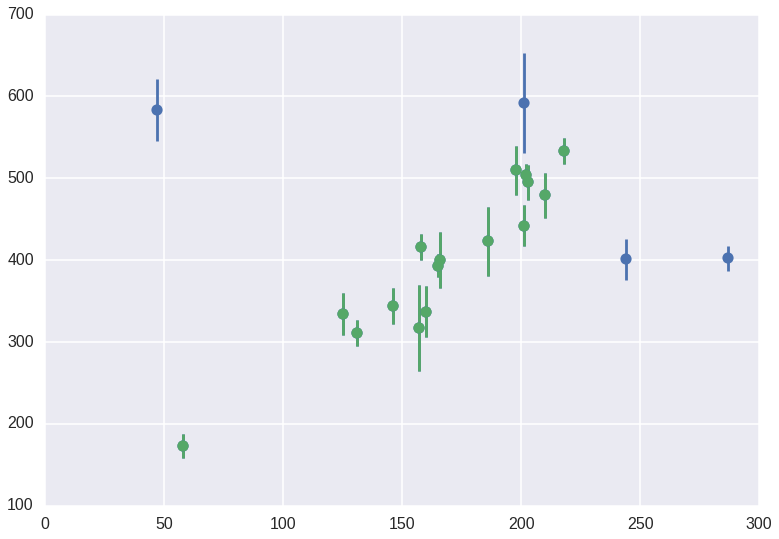

In [128]:
errorbar(all_x,all_y,yerr=all_sigma_y,linestyle='',marker='o')
errorbar(x,y,yerr=sigma_y,linestyle='',marker='o')

In [129]:
N = len(x)
A = np.zeros((N,2))
A[:,0] = 1.0
A[:,1] = x


In [147]:
A

array([[   1.,  203.],
       [   1.,   58.],
       [   1.,  210.],
       [   1.,  202.],
       [   1.,  198.],
       [   1.,  158.],
       [   1.,  165.],
       [   1.,  201.],
       [   1.,  157.],
       [   1.,  131.],
       [   1.,  166.],
       [   1.,  160.],
       [   1.,  186.],
       [   1.,  125.],
       [   1.,  218.],
       [   1.,  146.]])

In [130]:
C = np.diag(sigma_y**2)

In [131]:
Y = y

In [132]:
projection_operator = np.dot(A.T,np.linalg.inv(C))

In [133]:
X_cov = np.linalg.inv(np.dot(projection_operator,A))

In [134]:
X_cov

array([[  3.32922601e+02,  -1.88954491e+00],
       [ -1.88954491e+00,   1.16166311e-02]])

In [135]:
X = np.dot(X_cov,np.dot(projection_operator,Y))

In [136]:
X

array([ 34.04772776,   2.23992083])

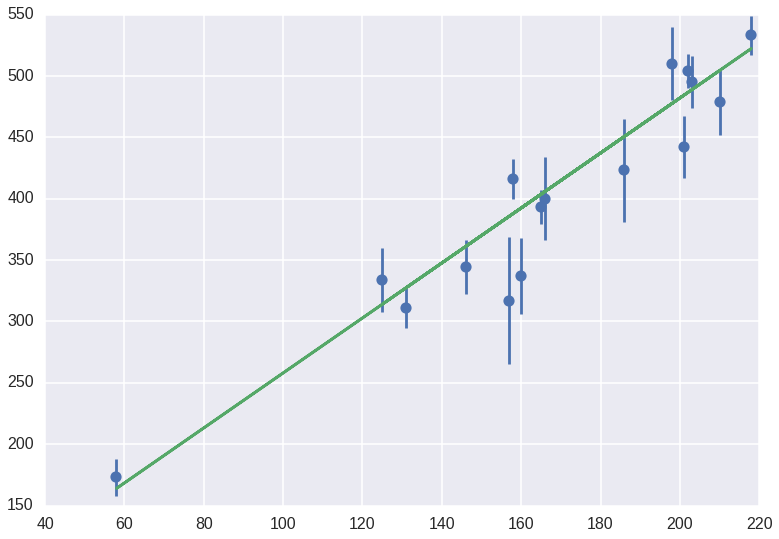

In [137]:
errorbar(x,y,yerr=sigma_y,linestyle='',marker='o')
plot(x,np.dot(A,X))

In [138]:
YminusAX = Y - np.dot(A,X)

In [152]:
chi2 = np.dot(np.dot(YminusAX.T,np.linalg.inv(C)),YminusAX)
chi2

18.680769911240805

In [37]:
chi2red = chi2/(N-2)
chi2red

1.3343407079457719

In [52]:
x = all_x
y = all_y
sigma_y  = all_sigma_y

In [53]:
N = len(x)
A = np.zeros((N,2))
A[:,0] = 1.0
A[:,1] = x

In [54]:
C = np.diag(sigma_y**2)
Y = y

In [55]:
projection_operator = np.dot(A.T,np.linalg.inv(C))

In [57]:
X_cov = np.linalg.inv(np.dot(projection_operator,A))

In [58]:
X = np.dot(X_cov,np.dot(projection_operator,Y))

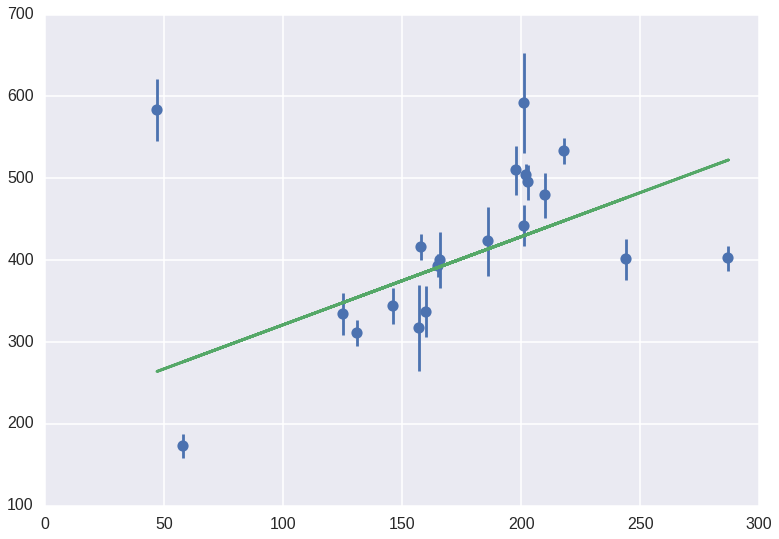

In [59]:
errorbar(x,y,yerr=sigma_y,linestyle='',marker='o')
plot(x,np.dot(A,X))

In [60]:
YminusAX = Y - np.dot(A,X)

In [61]:
chi2 = np.dot(np.dot(YminusAX.T,np.linalg.inv(C)),YminusAX)
chi2

289.96372278199931

In [62]:
chi2red = chi2/(N-2)
chi2red

16.109095710111074

In [170]:
x = all_x[4:]
y = all_y[4:]
sigma_y = all_sigma_y[4:]

In [64]:
N = len(x)
A = np.zeros((N,3))
A[:,0] = 1.0
A[:,1] = x
A[:,2] = x**2


In [66]:
np.vander(x,N=3)

array([[41209,   203,     1],
       [ 3364,    58,     1],
       [44100,   210,     1],
       [40804,   202,     1],
       [39204,   198,     1],
       [24964,   158,     1],
       [27225,   165,     1],
       [40401,   201,     1],
       [24649,   157,     1],
       [17161,   131,     1],
       [27556,   166,     1],
       [25600,   160,     1],
       [34596,   186,     1],
       [15625,   125,     1],
       [47524,   218,     1],
       [21316,   146,     1]])

In [187]:
def loglike(params,x,y,sigma_y):
    m,b = params
    model = m*x + b
    residual = y - model
    sigma_y = sigma_y*10.
    return -np.sum((residual / sigma_y)**2)
def logprior(params):
    m,b = params
    if (0 < m < 10) and (0 < b < 1000):
        return 0.0
    else:
        return -np.inf
def log_posterior(params,x,y,sigma_y):
    prior = logprior(params)
    if not np.isfinite(prior):
        return prior
    return prior + loglike(params,x,y,sigma_y)

In [188]:
initial_guess = np.array([1,0])[None,:] + np.random.rand(32,2)

In [88]:
import emcee,corner

In [189]:
sampler = emcee.EnsembleSampler(32,2,log_posterior,args=(x,y,sigma_y))

In [190]:
pos = sampler.run_mcmc(initial_guess,1000)

In [97]:
pos[1].shape

(32,)

In [191]:
samples = sampler.chain[:, 250:, :]

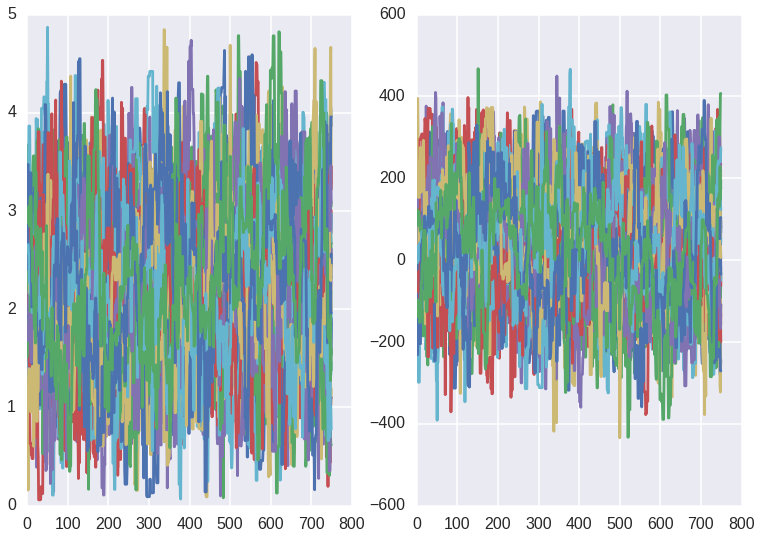

In [183]:
fig,axs = subplots(1,2)
axs[0].plot(samples[:,:,0].T)
blah = axs[1].plot(samples[:,:,1].T)



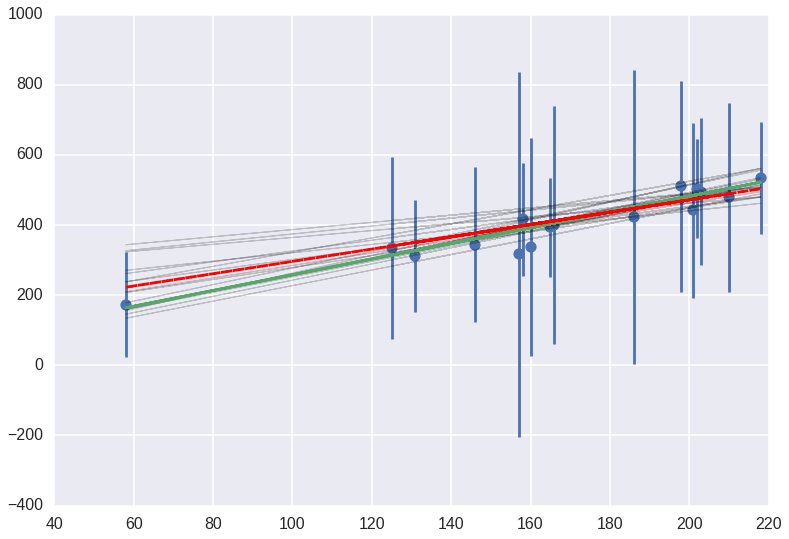

In [192]:
errorbar(x,y,yerr=sigma_y*10,linestyle='',marker='o')

for m,b in samples[0,np.random.randint(samples.shape[1],size=16)]:
    plot(x,m*x+b,color='k',lw=1,alpha=.2)

plot(x,X[1]*x+X[0])
mll,bll = samples.mean(0).mean(0)
plot(x,x*mll+bll,'r--')

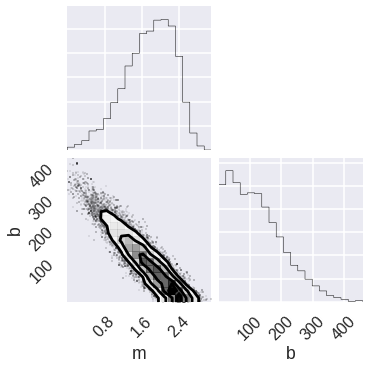

In [193]:
blah = corner.corner(samples.reshape((-1,2)),labels=['m','b'])

In [119]:
import scipy.stats

In [139]:
s = scipy.stats.multivariate_normal.rvs(mean=X,cov=X_cov,size=10000)

In [140]:
s.shape

(10000, 2)

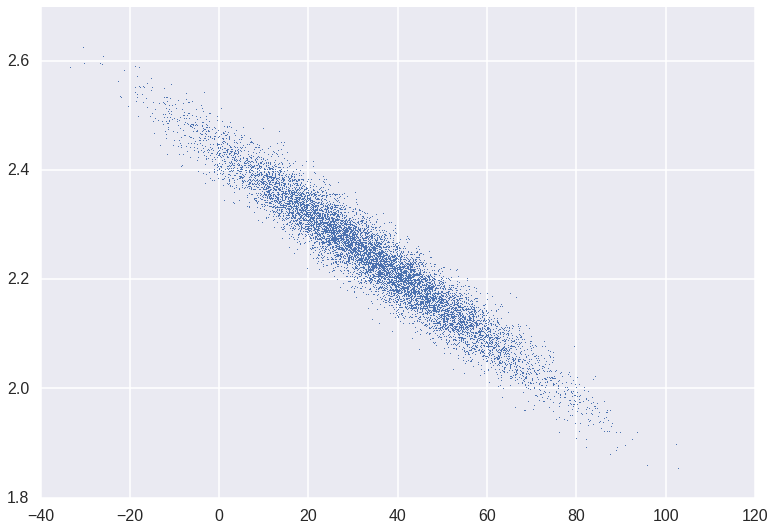

In [141]:
plot(s[:,0],s[:,1],',')

(0, 10)

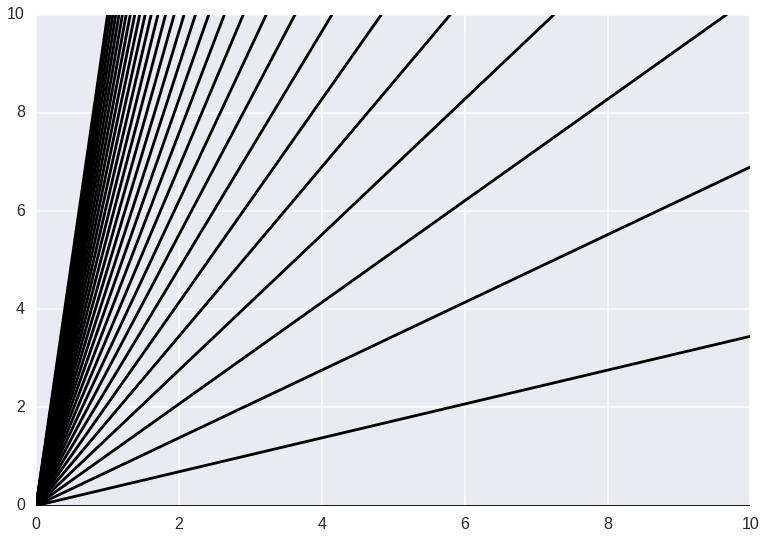

In [160]:
x = np.linspace(0,10,10)
for m in np.linspace(0,10,30):
    plot(x,m*x,'k')
ylim(0,10)

In [161]:
np.linalg.lstsq?